# Задача 2. Линейная регрессия, метод градиентного спуска

* **Дедлайн**: 22.10.2023, 23:59
* **Основной полный балл**: 5
* **Максимум баллов**: 10

## Задача

- [ ] Самостоятельно реализовать функцию **gradient_descent(X, y)**, которая по заданной обучающей выборке обучает модель линейной регрессии, оптимизируя функционал **методом градиентного спуска (Batch Gradient Descent, GD)** и возвращая вектор весов **w**. В качестве функционала можно выбрать, например, функцию ошибок **MSE** + $L_2$-регуляризатор. Использовать матрично-векторные операции для вычисления градиента.
- [ ] Найти данные, на которых интересно будет решать задачу регрессии. Зависимость целевого признака от нецелевых должна быть не слишком сложной, чтобы обученная линейная модель смогла показать приемлимый результат. В крайнем случае взять данные для предсказания стоимости машин [тут](https://github.com/rustam-azimov/ml-course-itmo/tree/main/data/car_price) (целевой признак для предсказания --- **price**).
- [ ] Считать данные, выполнить первичный анализ данных, при необходимости произвести чистку данных (**Data Cleaning**).
- [ ] Выполнить разведочный анализ (**EDA**), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи регрессии.
- [ ] При необходимости выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные), убрать ненужные признаки, создать новые (**Feature Engineering**).
- [ ] Случайным образом разбить данные на **обучающую** и **тестовую** выборки, используя методы существующих библиотек.
- [ ] При обучении моделей использовать **масштабирование данных**.
- [ ] Обучить модель на обучающей выборке, используя функцию **gradient_descent(X, y)**. Оценить качество модели на обучающей и тестовой выборках, используя **MSE**, **RMSE** и $R^2$.
- [ ] Обучить модель, используя существующую библиотеку. Например, в **sklearn** для $L_2$-регуляризатора можно использовать **Ridge**. Сравнить качество с Вашей реализацией.
- [ ] Повторить тоже самое, но используя **кросс-валидацию**.
- [ ] Создать таблицу, со строками (mse-train, mse-test, rmse-train, rmse-test, r2-train, r2-test) и столбцами (Fold1, Fold2, ..., Foldk, E, STD), где k --- количество фолдов в кросс-валидации, **E** --- мат. ожидание и **STD** --- стандартное отклонение. Сделать выводы.
- [ ] * (+2 балла) Перед обучением моделей подобрать наилучшее количество (и само подмножество) признаков, например используя **Recursive Feature Elimination (RFE)** из **sklearn**.
- [ ] * (+1 балл) Во все ваши реализации добавить возможность настройки нужных **гиперпараметров**, а в процессе обучения **всех** моделей осуществить подбор оптимальных значений этих гиперпараметров.
- [ ] * (+1 балл) Также самостоятельно реализовать **метод стохастического градиентного спуска (Stochastic Gradient Descent, SGD)**, обучить модели и добавить их во все сравнения.
- [ ] * (+1 балл) Также самостоятельно реализовать **метод мини-пакетного градиентного спуска (Mini Batch Gradient Descent)**, обучить модели и добавить их во все сравнения.


In [72]:
%matplotlib inline
from matplotlib import pyplot as plt
from bs4 import BeautifulSoup
import seaborn as sns
import pandas as pd
import numpy as np
import requests
import time
import re

# Data Cleaning

In [73]:
df = pd.read_csv('../data/car_price/car_price.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

Nan нет, значения есть для каждого индекса

In [75]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [76]:
df['fueltype'].describe()

count     205
unique      2
top       gas
freq      185
Name: fueltype, dtype: object

In [77]:
df['fuel_category'] = 0 
df.loc[df['fueltype'] == 'gas', 'fuel_category'] = 1  
df['fuel_category'].describe()


count    205.000000
mean       0.902439
std        0.297446
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: fuel_category, dtype: float64

# EDA

<Axes: xlabel='price', ylabel='Count'>

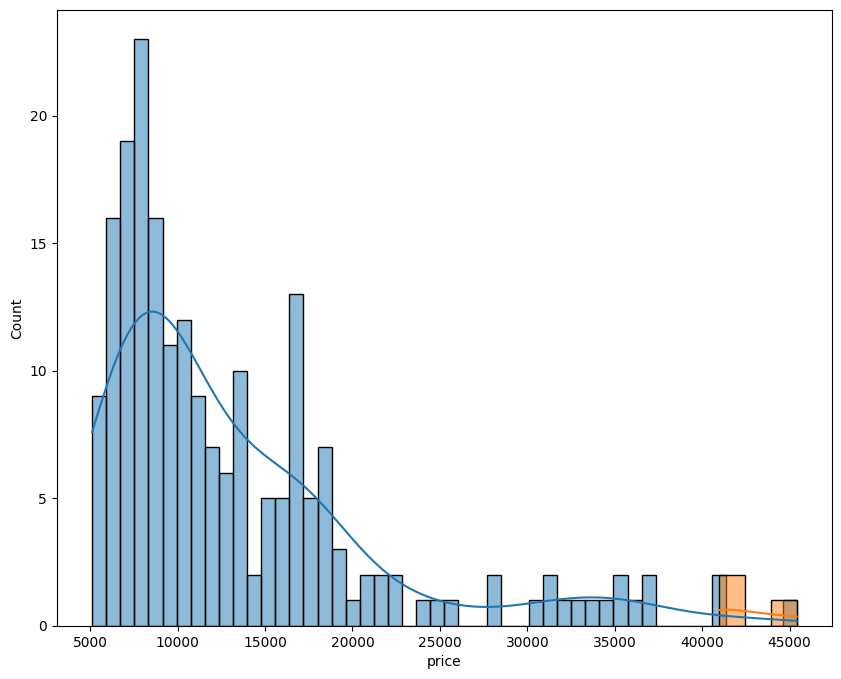

In [78]:
plt.figure(figsize=(10, 8))
sns.histplot(df['price'], bins = 50, kde=True)
sns.histplot(df[df['price'] > 40000]['price'], kde=True)

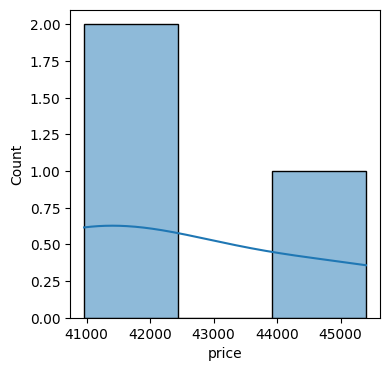

In [79]:
# Гистограмма
plt.figure(figsize=(4, 4))
sns.histplot(df[df['price'] > 40000]['price'], kde=True)
plt.show()

1% самых дорогих автомобилей - выброс содержащий 2 авто дороже 40к $

<Axes: xlabel='horsepower', ylabel='Count'>

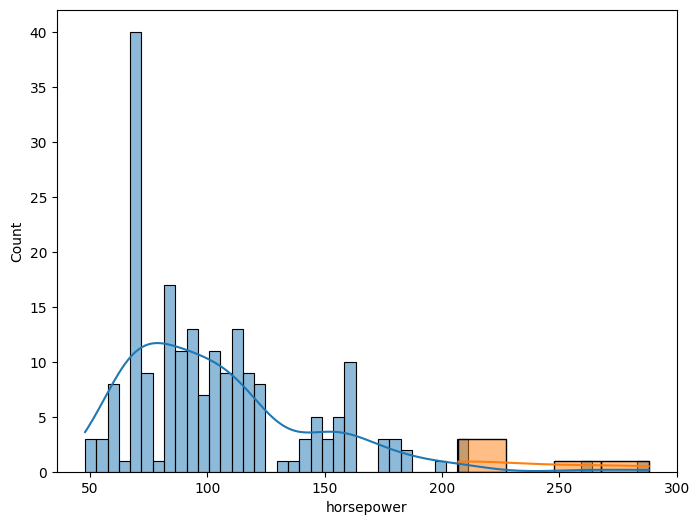

In [80]:
plt.figure(figsize=(8, 6))
sns.histplot(df['horsepower'], bins = 50, kde=True)
sns.histplot(df[df['horsepower'] > 200]['horsepower'], kde=True)

<Figure size 800x600 with 0 Axes>

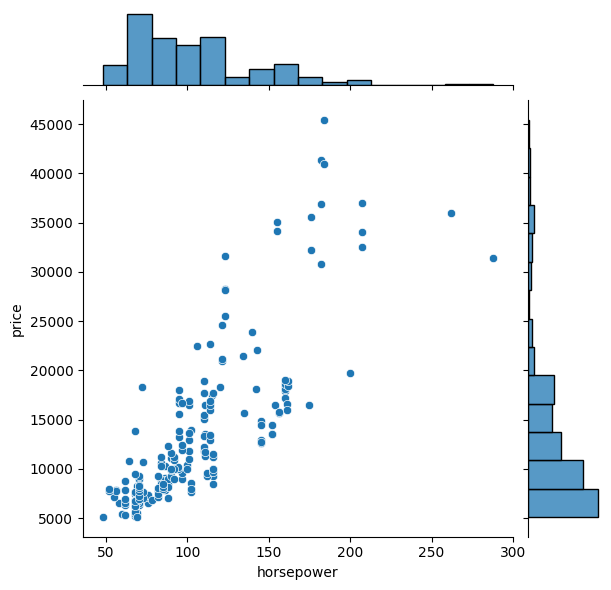

In [81]:
plt.figure(figsize=(8, 6))
sns.jointplot(data = df, x = 'horsepower', y = "price", kind="scatter")
#`kind` must be one of ['scatter', 'hist', 'hex', 'kde', 'reg', 'resid'],

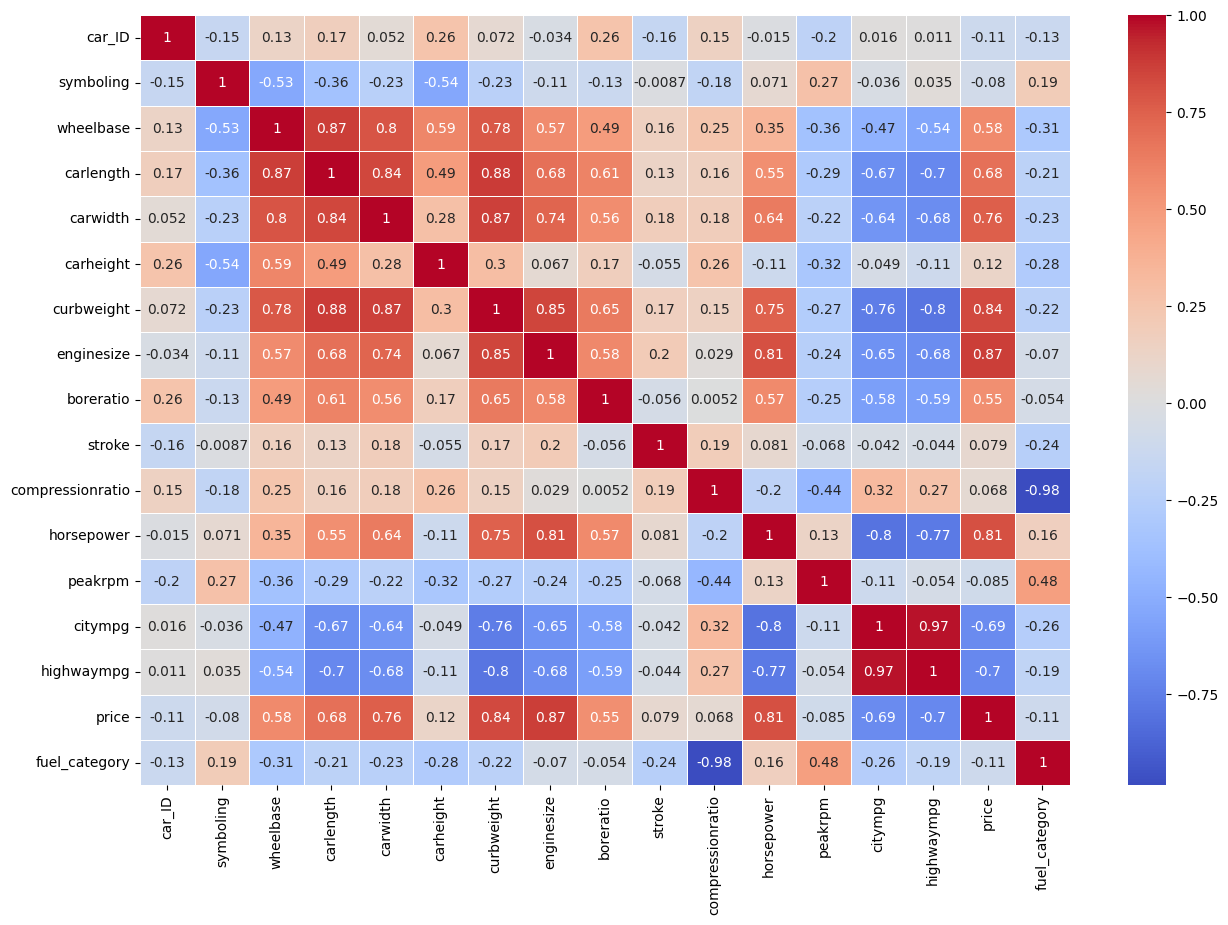

In [82]:
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
fig = plt.gcf()
fig.set_size_inches(15, 10)

In [83]:
df.select_dtypes(include=[np.number]).describe()
['car_ID', 'symboling', 'wheelbase', 'carlength', 'carheight', 'boreratio', 'stroke', 'compressionratio', 'peakrpm', 'highwaympg', 'citympg']

['car_ID',
 'symboling',
 'wheelbase',
 'carlength',
 'carheight',
 'boreratio',
 'stroke',
 'compressionratio',
 'peakrpm',
 'highwaympg',
 'citympg']

In [84]:
df = df.drop(columns=['car_ID', 'symboling', 'wheelbase', 'carlength', 'carheight', 'boreratio', 'stroke', 'compressionratio', 'peakrpm', 'highwaympg', 'citympg'])

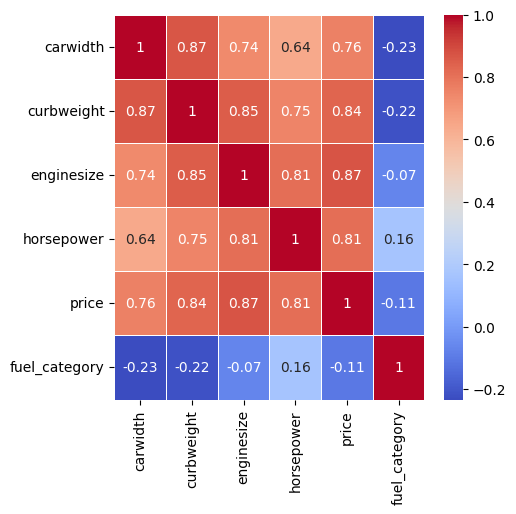

In [85]:
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
fig = plt.gcf()
fig.set_size_inches(5, 5)

In [89]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CarName         205 non-null    object 
 1   fueltype        205 non-null    object 
 2   aspiration      205 non-null    object 
 3   doornumber      205 non-null    object 
 4   carbody         205 non-null    object 
 5   drivewheel      205 non-null    object 
 6   enginelocation  205 non-null    object 
 7   carwidth        205 non-null    float64
 8   curbweight      205 non-null    int64  
 9   enginetype      205 non-null    object 
 10  cylindernumber  205 non-null    object 
 11  enginesize      205 non-null    int64  
 12  fuelsystem      205 non-null    object 
 13  horsepower      205 non-null    int64  
 14  price           205 non-null    float64
 15  fuel_category   205 non-null    int64  
dtypes: float64(2), int64(4), object(10)
memory usage: 25.8+ KB


,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,horsepower,price,fuel_category
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,64.1,2548,dohc,four,130,mpfi,111,13495.0,1
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,64.1,2548,dohc,four,130,mpfi,111,16500.0,1
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,65.5,2823,ohcv,six,152,mpfi,154,16500.0,1
3,audi 100 ls,gas,std,four,sedan,fwd,front,66.2,2337,ohc,four,109,mpfi,102,13950.0,1
4,audi 100ls,gas,std,four,sedan,4wd,front,66.4,2824,ohc,five,136,mpfi,115,17450.0,1


In [90]:
df = df.drop(columns=['fueltype'])

In [131]:
df['aspiration'].describe()

count     205
unique      2
top       std
freq      168
Name: aspiration, dtype: object

In [132]:
df['aspiration_type'] = 0
df.loc[df['aspiration'] == 'std','aspiration_type'] = 1  
df['aspiration_type'].describe()
df = df.drop(columns=['aspiration'])

In [102]:
df['doornumber'].describe()

count      205
unique       2
top       four
freq       115
Name: doornumber, dtype: object

In [103]:
replace_dict = {'two': 2, 'four': 4}

df['doornumber'] = df['doornumber'].replace(replace_dict)

In [104]:
df['doornumber'].describe()

count    205.000000
mean       3.121951
std        0.994966
min        2.000000
25%        2.000000
50%        4.000000
75%        4.000000
max        4.000000
Name: doornumber, dtype: float64

In [122]:
data = pd.read_csv('../data/car_price/car_price.csv')
data['fuelsystem'], unique_categories = pd.factorize(data['fuelsystem'])
print(unique_categories)

Index(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'], dtype='object')


In [140]:
replace_dict = {'convertible': 1, 'hatchback': 2, 'sedan': 3, 'wagon': 4, 'hardtop': 5}

df['carbody'] = df['carbody'].replace(replace_dict)

replace_dict = {'rwd': 1, 'fwd': 2, '4wd': 3}

df['drivewheel'] = df['drivewheel'].replace(replace_dict)

replace_dict = {'front': 1, 'rear': 2}

df['enginelocation'] = df['enginelocation'].replace(replace_dict)

replace_dict = {'four': 4, 'six': 6, 'five': 5, 'three': 3, 'twelve': 12, 'two': 2, 'eight': 8}

df['cylindernumber'] = df['cylindernumber'].replace(replace_dict)

In [ ]:
df = df.drop(columns=['aspiration'])

In [141]:
df.describe()
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CarName          205 non-null    object 
 1   doornumber       205 non-null    int64  
 2   carbody          205 non-null    int64  
 3   drivewheel       205 non-null    int64  
 4   enginelocation   205 non-null    int64  
 5   carwidth         205 non-null    float64
 6   curbweight       205 non-null    int64  
 7   enginetype       205 non-null    object 
 8   cylindernumber   205 non-null    int64  
 9   enginesize       205 non-null    int64  
 10  fuelsystem       205 non-null    object 
 11  horsepower       205 non-null    int64  
 12  price            205 non-null    float64
 13  fuel_category    205 non-null    int64  
 14  aspiration_type  205 non-null    int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 24.2+ KB


,CarName,doornumber,carbody,drivewheel,enginelocation,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,horsepower,price,fuel_category,aspiration_type
0,alfa-romero giulia,2,1,1,1,64.1,2548,dohc,4,130,mpfi,111,13495.0,1,1
1,alfa-romero stelvio,2,1,1,1,64.1,2548,dohc,4,130,mpfi,111,16500.0,1,1
2,alfa-romero Quadrifoglio,2,2,1,1,65.5,2823,ohcv,6,152,mpfi,154,16500.0,1,1
3,audi 100 ls,4,3,2,1,66.2,2337,ohc,4,109,mpfi,102,13950.0,1,1
4,audi 100ls,4,3,3,1,66.4,2824,ohc,5,136,mpfi,115,17450.0,1,1


In [ ]:
df = df.drop( columns=['CarName', 'enginetype', 'fuelsystem' ])